In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("breast-cancer-dataset.csv")
data

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [9]:
# Convert columns to appropriate types
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Tumor Size (cm)'] = pd.to_numeric(data['Tumor Size (cm)'], errors='coerce')
data['Inv-Nodes'] = pd.to_numeric(data['Inv-Nodes'], errors='coerce')
data['Metastasis'] = pd.to_numeric(data['Metastasis'], errors='coerce')
data['History'] = pd.to_numeric(data['History'], errors='coerce')
data['Menopause'] = pd.to_numeric(data['Menopause'], errors='coerce')

In [10]:
# Create binary target variable (1 for Malignant, 0 for Benign)
data['Malignant'] = data['Diagnosis Result'].apply(lambda x: 1 if x == 'Malignant' else 0)

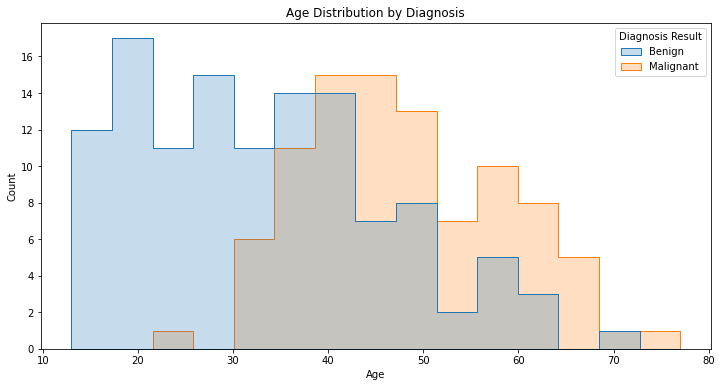

In [11]:
# Age distribution by diagnosis
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Diagnosis Result', element='step', common_norm=False, bins=15)
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

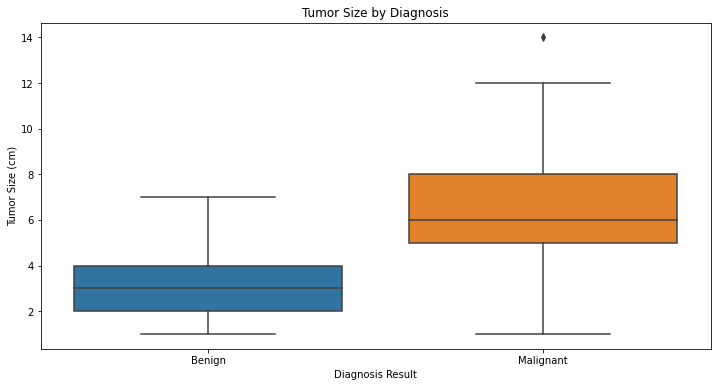

In [12]:
# Tumor size by diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diagnosis Result', y='Tumor Size (cm)', data=data)
plt.title('Tumor Size by Diagnosis')
plt.show()

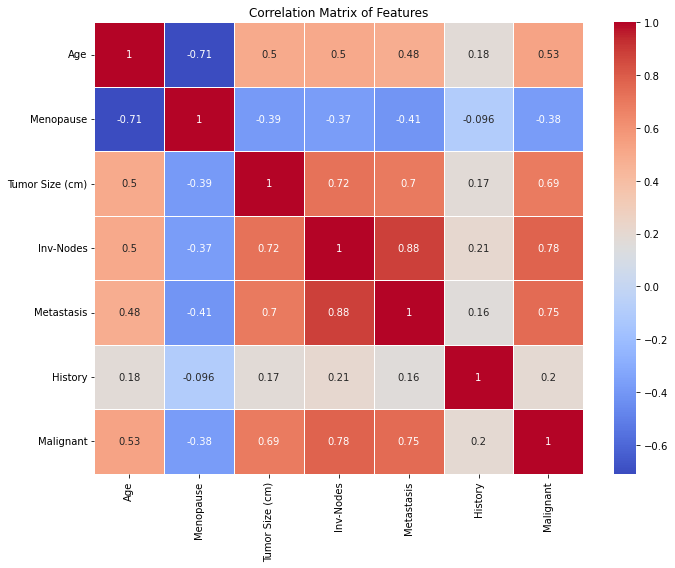

In [13]:
# Create a correlation matrix for numerical variables
numeric_columns = ['Age', 'Menopause', 'Tumor Size (cm)', 'Inv-Nodes', 'Metastasis', 'History', 'Malignant']
correlation_data = data[numeric_columns].copy()
plt.figure(figsize=(10, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [16]:
# Create a summary table of key risk factors
risk_factors = pd.DataFrame({
    'Factor': ['Large Tumor Size (>5cm)', 'Invasive Nodes Present', 'Metastasis Present', 'Age > 50', 'Family History'],
    'Malignant Rate': [
        data[data['Tumor Size (cm)'] > 5]['Malignant'].mean() * 100,
        data[data['Inv-Nodes'] > 0]['Malignant'].mean() * 100,
        data[data['Metastasis'] > 0]['Malignant'].mean() * 100,
        data[data['Age'] > 50]['Malignant'].mean() * 100,
        data[data['History'] > 0]['Malignant'].mean() * 100
    ]
})

print("\nMalignancy Rates by Risk Factor:")
print(risk_factors.sort_values('Malignant Rate', ascending=False))


Malignancy Rates by Risk Factor:
                    Factor  Malignant Rate
1   Invasive Nodes Present       98.630137
0  Large Tumor Size (>5cm)       94.827586
2       Metastasis Present       94.520548
3                 Age > 50       73.333333
4           Family History       55.172414


In [31]:
# Create age groups for easier interpretation
data['Age_Group'] = pd.cut(data['Age'], 
                          bins=[0, 30, 40, 50, 60, 100],
                          labels=['≤30', '31-40', '41-50', '51-60', '60+'])
# Set up the figure with multiple subplots
plt.figure(figsize=(18, 12))

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

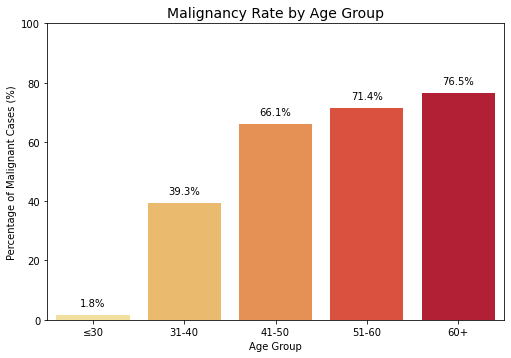

In [35]:
# 1. Top left: Malignancy rate by age group
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
malignancy_by_age = data.groupby('Age_Group')['Diagnosis Result'].apply(
    lambda x: (x == 'Malignant').mean() * 100)
sns.barplot(x=malignancy_by_age.index, y=malignancy_by_age.values, palette='YlOrRd')
plt.title('Malignancy Rate by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Percentage of Malignant Cases (%)')
plt.ylim(0, 100)

for i, v in enumerate(malignancy_by_age):
    plt.text(i, v + 3, f'{v:.1f}%', ha='center')


# Part B Bubble chart

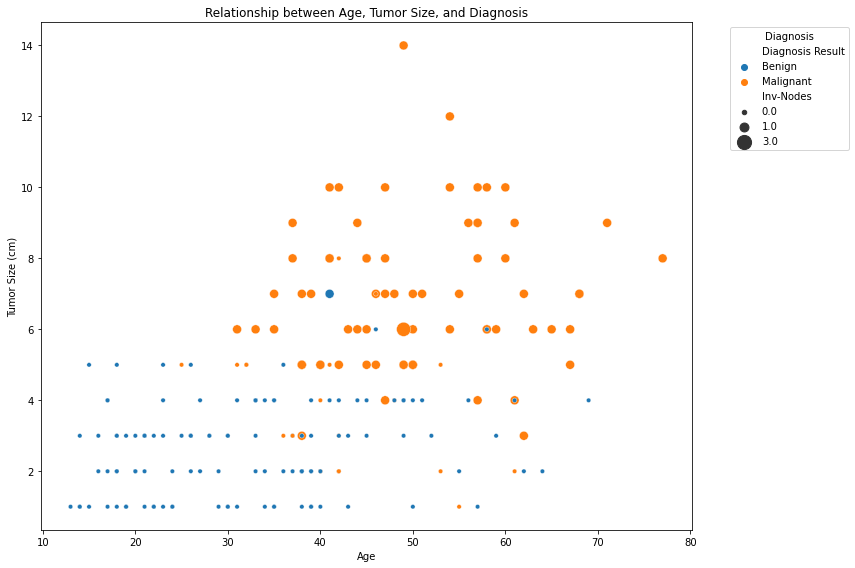

In [20]:
# Create a visualization showing the relationship between tumor size and age, colored by diagnosis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Tumor Size (cm)', hue='Diagnosis Result', 
                size='Inv-Nodes', sizes=(20, 200), data=data)
plt.title('Relationship between Age, Tumor Size, and Diagnosis')
plt.xlabel('Age')
plt.ylabel('Tumor Size (cm)')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()